# <center>Laboratorium 8: wartości własne</center>

In [23]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt


***Zadanie 1***   

Wykorzystując funkcję *random_matrix_by_egval* wygenerować losowe macierze dla zadanych zestawów wartości własnych:

$\lambda_{1} = \{ 0 , 1 , 2 , ... , 20 \}$

$\lambda_{2} = \{ 10^{-10} , 10^{-9} , ... , 10^{-1} , 1 \}$

$\lambda_{3} = \{ j , -j , 1+j , 1-j \}$

Następnie dla wygenerowanych macierzy oblicz wartości własne za pomocą funkcji *eigvals* i wyrysuj je na wykresie.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
[0.+1.j 0.-1.j 1.+1.j 1.-1.j]


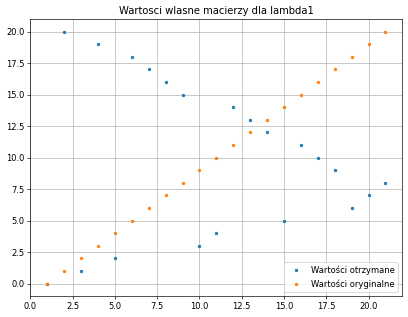

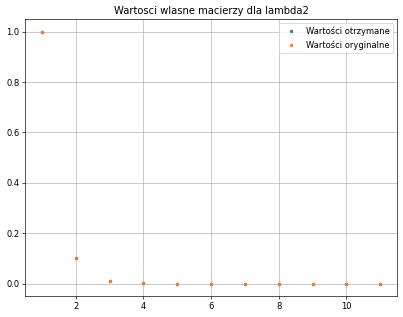

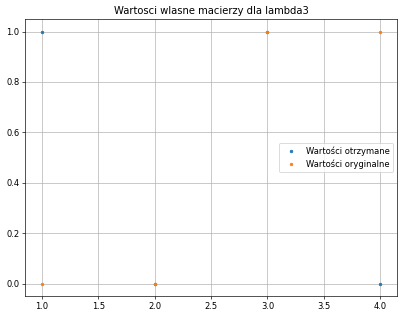

In [59]:
lambda1 = np.array([x for x in range(0,21)])
lambda2 = np.array([10 ** (-i) for i in range(0,11)])
lambda3 = np.array([complex(0,1),complex(0,-1),complex(1,1),complex(1,-1)])

print(lambda1)
print(lambda2)
print(lambda3)

lst = [lambda1,lambda2,lambda3]
names = ['lambda1','lambda2','lambda3']
a = 0

matrix = []
eigval_values = []

for i in lst:

    A = main.random_matrix_by_egval(i)
    matrix.append(A)
    values = np.linalg.eigvals(A)
    eigval_values.append(values)

    plt.figure(figsize=(8, 6), dpi=60)
    plt.plot(np.arange(1, len(i)+1, 1), values, '.')
    plt.plot(np.arange(1, len(i)+1, 1), i, '.')
    plt.legend(['Wartości otrzymane','Wartości oryginalne'])
    plt.title("Wartosci wlasne macierzy dla " + names[a]); a += 1
    plt.grid()
    plt.show()

***Zadanie 2***   

Wykorzystując zestawy wartości własnych z zadania pierwszego wygeneruj macierze funkcją *random_matrix_by_egval* (lub uzyj wygenerowanych wcześniej macierzy). 

Następnie do otrzymanych wyników dodaj macierz $B$, gdzie $B = \alpha I$, przy czym $\alpha$ równa się ilości liter w Twoim nazwisku.

Wypisz wartości własne otrzymanej w ten sposób macierzy. Porównaj je z pierwotnie wykorzystanymi.

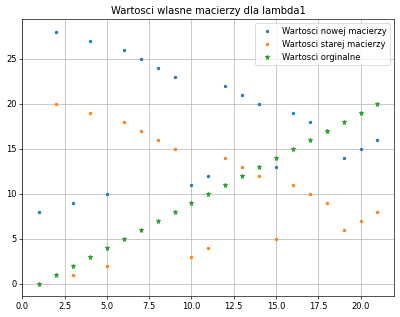

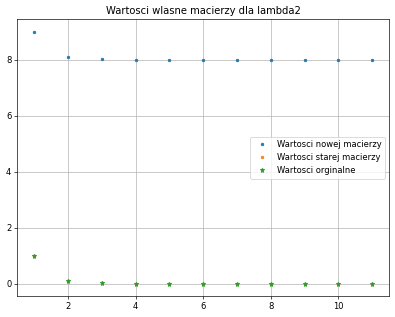

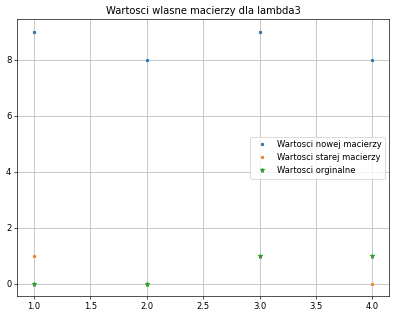

In [60]:
surname = 'Cynarski'
n = len(surname)
a = 0

for m in matrix:

    i = len(m[0])
    B = np.eye(i,dtype=int) * n
    new_matrix = m + B
    new_values = np.linalg.eigvals(new_matrix)
    plt.figure(figsize=(8, 6), dpi=60)
    plt.title("Wartosci wlasne macierzy dla " + names[a])
    plt.plot(np.arange(1, len(m)+1, 1), new_values, '.')
    plt.plot(np.arange(1, len(m)+1, 1), eigval_values[a], '.')
    plt.plot(np.arange(1, len(m)+1, 1), lst[a], '*')
    plt.legend(["Wartosci nowej macierzy", "Wartosci starej macierzy", "Wartosci orginalne"])
    plt.grid()
    a += 1


    plt.show()

***Zadanie 3***   

Dokonaj analizy wrazliwości na zaburzenia ze wzgledu na uzywaną formę reprezentacji. Wykorzystaj do tego następujący zestaw wartości własnych: $\lambda = \{ 0 , 1 , 2 , ... , 20 \}$

1) Zaimplementuj funkcję *polly_from_egval* przekształcająca podane wartości własne, na wielomian charakterystyczny. W kolejnym kroku wykorzystaj zaimplementowana wczesniej funkcje *frob_a* do przejścia z postaci wielomiano charakterystycznego na macierz Frobeniusa. W ostatnim kroku oblicz wartości własne ostatecznej macierzy i wyrysuj jest na wykresie (w postaci kółek).

2) Kolejno powtórz czynności punktu pierwszego, dodając zaburzenia współczynników wielomianu charakterystycznego poprzez dodanie losowej wartości postaci $(10^{-10})N(0,1)$, przed przekształceniem na macierz Frobeiusa. Wartości własne narysuj na tym samym wykresie co uprzednie (w postaci krzyzyków)

3) Zaimplementuj funkcję przekształcająca podane wartości własne, na losową macierz (wykorzystaj zaimplementowana wczesniej funkcje *random_matrix_by_egval*). Potem oblicz wartości własne ostatecznej macierzy i wyrysuj jest na nowym wykresie (w postaci kółek).

4) Kolejno powtórz czynności punktu trzeciego, dodając zaburzenia do wygenerowanej (tej samej!) macierzy poprzez dodanie do niej macierzy $R$, gdzie kazda z jej wartości jest postaci $(10^{-10})N(0,1)$. Oblicz wartości własnej nowej macierzy i narysuj je na tym samym wykresie co uprzednie (w postaci krzyzyków)

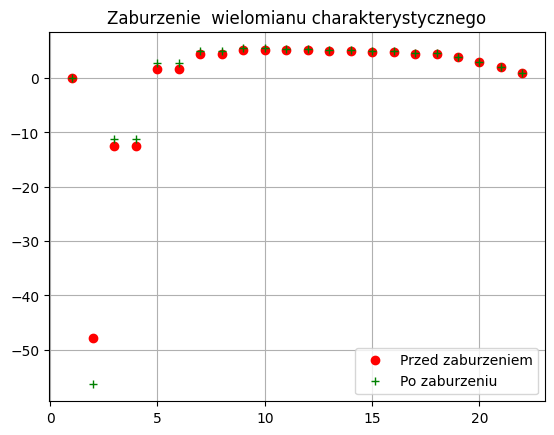

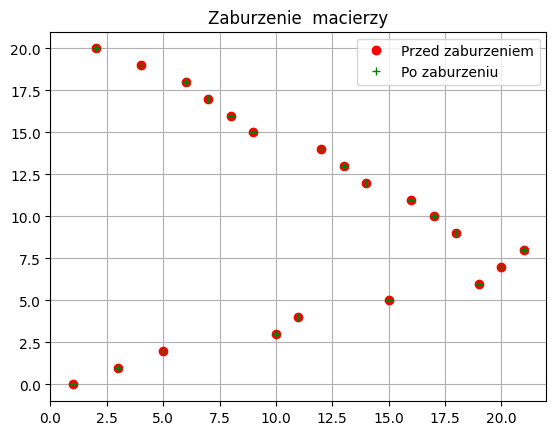

In [33]:
vector = np.array([x for x in range(0,21)])
n = len(vector)

# 1)

polynomial = main.polly_from_egval(vector)
matrix = main.frob_a(polynomial)
eigval_values = np.linalg.eigvals(matrix)

plt.plot(np.arange(1, n+2, 1),eigval_values,'or')
plt.title("Zaburzenie  wielomianu charakterystycznego")

# 2)

x = pow(10,-10) *  np.random.randn(n+1)

polynomial += polynomial + x
matrix = main.frob_a(polynomial)
eigval_values = np.linalg.eigvals(matrix)

plt.plot(np.arange(1, n+2, 1),eigval_values,'+g')
plt.legend(["Przed zaburzeniem", "Po zaburzeniu"])
plt.grid()
plt.show()

# 3)

matrix = main.random_matrix_by_egval(vector)
eigval_values = np.linalg.eigvals(matrix)
plt.plot(np.arange(1, n+1, 1),eigval_values,'or')
plt.title("Zaburzenie  macierzy")

# 4)

A = pow(10,-10) * np.random.randn(n,n)
matrix += A
eigval_values = np.linalg.eigvals(matrix)
plt.plot(np.arange(1, n+1, 1),eigval_values,'+g')
plt.legend(["Przed zaburzeniem", "Po zaburzeniu"])
plt.grid()
plt.show()

***Zadanie 4***   

Dokonaj analizy dla zestawu wartości własnych: $\lambda = \{ 1 - 10^{-K}, K = 0,1,2,...,20 \}$. na dwa sposoby:

1) Poprzez utworzenie losowej macierzy, obliczenie wartości własnych, a następnie ich wyrysowania.
2) Poprzez obliczenie pierwiatków wielomianu charakterystycznego, a następnie ich wyrysowania.

Wykorzystaj wcześniej zaimplementowane funkcje.

C:\Users\Michał\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


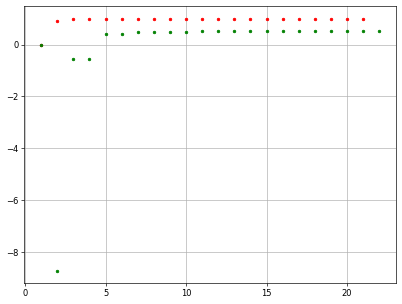

In [63]:
vector = np.array([(1 - 10 ** (-K)) for K in range(0, 21)])

# 1
matrix = main.random_matrix_by_egval(vector)
values = np.linalg.eigvals(matrix)

# 2
polynomial = main.polly_from_egval(vector)
new_matrix = main.frob_a(polynomial)
new_values = np.linalg.eigvals(new_matrix)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(np.arange(1, len(vector) + 1),values, '.r')
plt.plot(np.arange(1, len(polynomial) + 1),new_values, '.g')
plt.grid()
plt.show()

WNIOSKI:
Na dzisiejszych zajęciach omawialiśmy temat wartości własnych, wielomianu charakterystycznego i macierzy Frobeniusa. Na zajęciach sprawdzaliśmy jak numerycznie sa wyznaczane maciarze z zadanymi wartościami własnymi oraz jak są wyliczane wartości własne tych macierzy. Następnie sprawdzaliśmy błedy między tymi dwiema czynnościami. Sprawdzaliśmy również jak zaburzenia wielomianu charakterystycznego lub macierzy wpływa na wartości własne. Mogliśmy zauważyc, że zaburzenie wielomianu może znacznie zmienić wartości własnie a zaburzenie macierzy znacznie ich nie zmiania.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)